# Employee exit survey data cleaning

Will be working with australian employer exit survey.

In [152]:
import pandas as pd
import numpy as np
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')
print(dete_survey.info())
print(dete_survey.head())

print(tafe_survey.info())
print(tafe_survey.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

Dete survey contains lots of missing values in some columns (aboriginal, etc). Some missing values are also indicated as "not stated".

Tefe survey contains extremely long and impractical column names that need to be changed.

In [153]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
print(dete_survey_updated.info())
print(tafe_survey_updated.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

Values "not stated" were corrected to be read as NaN, while columns unnneeded for analysis were dropped.

In [154]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.strip().str.lower()

In [155]:
col_dict = {'Record ID' : 'id', 'CESSATION YEAR' : 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type':'employment_status', 'Classification. Classification' : 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)' : 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(col_dict, axis=1)

In [156]:
print(dete_survey_updated.head())
print(tafe_survey_updated.head())

   id                    separationtype cease_date  dete_start_date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   role_start_date                                      position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  classification              region                      business_unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-A

Column names were changed to match between both dataframes.

In [157]:
print(dete_survey_updated['separationtype'].value_counts(dropna=False), '\n')
print(tafe_survey_updated['separationtype'].value_counts(dropna=False))

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64 

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64


In [158]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')].copy() 
print(dete_resignations['separationtype'].value_counts(), '\n')

mask = tafe_survey_updated['separationtype'].str.contains('Resignation', na=False)
tafe_resignations = tafe_survey_updated[mask]
print(tafe_resignations['separationtype'].value_counts())

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64 

Resignation    340
Name: separationtype, dtype: int64


Separated data indicating end of employment due to resignation from the rest. In case of tafe data, assigned one missing value row to false. Dete data has 3 types of resignations, while tefe only has one.

In [159]:
print(dete_resignations['cease_date'].value_counts(dropna=False), '\n')
dete_resignations['cease_date'] = dete_resignations['cease_date'].str[-4:].astype(float)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
NaN         11
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
09/2010      1
07/2006      1
2010         1
Name: cease_date, dtype: int64 



Will fix this column by extracting years and converting to float.

In [160]:
print(dete_resignations['cease_date'].value_counts(dropna=False).sort_index(), '\n')
print(dete_resignations['dete_start_date'].value_counts(dropna=False).sort_index(), '\n')

print(tafe_resignations['cease_date'].value_counts(dropna=False).sort_index())

 2006.0      1
 2010.0      2
 2012.0    129
 2013.0    146
 2014.0     22
NaN         11
Name: cease_date, dtype: int64 

 1963.0     1
 1971.0     1
 1972.0     1
 1973.0     1
 1974.0     2
 1975.0     1
 1976.0     2
 1977.0     1
 1980.0     5
 1982.0     1
 1983.0     2
 1984.0     1
 1985.0     3
 1986.0     3
 1987.0     1
 1988.0     4
 1989.0     4
 1990.0     5
 1991.0     4
 1992.0     6
 1993.0     5
 1994.0     6
 1995.0     4
 1996.0     6
 1997.0     5
 1998.0     6
 1999.0     8
 2000.0     9
 2001.0     3
 2002.0     6
 2003.0     6
 2004.0    14
 2005.0    15
 2006.0    13
 2007.0    21
 2008.0    22
 2009.0    13
 2010.0    17
 2011.0    24
 2012.0    21
 2013.0    10
NaN        28
Name: dete_start_date, dtype: int64 

 2009.0      2
 2010.0     68
 2011.0    116
 2012.0     94
 2013.0     55
NaN          5
Name: cease_date, dtype: int64


Start and end dates seem coherent and consistent accross both dataframes, except for 2006, 2009, and 2011.

In [161]:
dete_resignations['institute_service'] = dete_resignations['cease_date']-dete_resignations['dete_start_date']
print(dete_resignations.head(1))

   id             separationtype  cease_date  dete_start_date  \
3   4  Resignation-Other reasons      2012.0           2005.0   

   role_start_date position classification              region business_unit  \
3           2006.0  Teacher        Primary  Central Queensland           NaN   

     employment_status        ...          workload  none_of_the_above  \
3  Permanent Full-time        ...             False              False   

   gender    age  aboriginal  torres_strait  south_sea  disability  nesb  \
3  Female  36-40         NaN            NaN        NaN         NaN   NaN   

   institute_service  
3                7.0  

[1 rows x 36 columns]


Created a service duration column by subtracting the cease date from the start date in the dete data.

In [162]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val=='-':
        return False
    else:
        return True

col_list_tafe = ['Contributing Factors. Dissatisfaction',
                 'Contributing Factors. Job Dissatisfaction']
col_list_dete = ['job_dissatisfaction',
                 'dissatisfaction_with_the_department',
                 'physical_work_environment',
                 'lack_of_recognition',
                 'lack_of_job_security',
                 'work_location',
                 'employment_conditions',
                 'work_life_balance',
                 'workload']

dete_resignations['dissatisfied'] = dete_resignations[col_list_dete].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)



False    162
True     149
Name: dissatisfied, dtype: int64

In [163]:
# tafe_resignations['dissatisfied'] = tafe_resignations[col_list_tafe].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

If any factor indicating dissatisfaction was indicated, set new column to indicate so.

In [164]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [165]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

In [166]:
combined_updated = combined.dropna(thresh = 500, axis=1).copy()
combined_updated.notnull().sum().sort_values()

institute_service    563
gender               592
age                  596
employment_status    597
position             598
cease_date           635
dissatisfied         643
id                   651
institute            651
separationtype       651
dtype: int64

Removed columns with less than 500 non null values

In [167]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
21.0                   3
39.0                   3
30.0                   2
25.0                   2
26.0                   2
28.0                   2
36.0                   2


In [168]:
combined_updated['institute_service'] =combined_updated['institute_service'].astype(str).str.extract(r'(\d+)').astype(float)
combined_updated['institute_service'].value_counts(dropna=False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


 1.0     159
NaN       88
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: institute_service, dtype: int64

In [169]:
def career_stage(year):
    if pd.isnull(year):
        return np.nan
    elif year <3:
        return 'New'
    elif 3 <= year <7:
        return 'Experienced'
    elif 7 <= year <11:
        return 'Established'
    elif year>= 11:
        return 'Veteran'
    
combined_updated['service_cat'] = combined_updated['institute_service'].apply(career_stage)
combined_updated['service_cat'].value_counts(dropna=False)
                                                                             

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

Applied a category to each year of service in order to perform analysis.

In [170]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [172]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

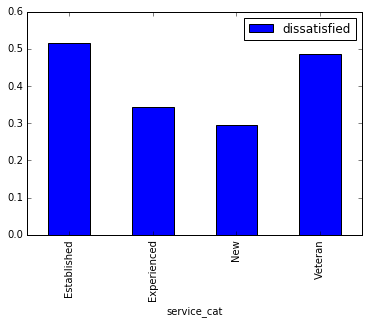

In [174]:
%matplotlib inline
pd.pivot_table(combined_updated, 'dissatisfied', 'service_cat').plot(kind='bar') 

Newer employees tend to be less dissatisfied when leaving.